# Analisis de Datos Filtrados
El objetivo es repetir y ampliar el analisis ya hecho, pero ahora con la data tal cual será utilizada para el modelado.

## Preparacion

In [2]:
# Importo librerías
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.image as mpimg
import os

In [3]:
directorio_filtered = './filtered_data'
ruta_posiciones_filtered = os.path.join(directorio_filtered, 'data_posiciones_filtered.csv')
data_posiciones_filtered = pd.read_csv(ruta_posiciones_filtered)

data_posiciones_filtered.sample(7)

id  match_id  player_id           x           y  velocity_x  \
34756  63260        95         81 -176.420536  -66.523952   43.126411   
29976  56980        89         86  268.413487  -44.399172   43.599230   
55670  87273       128          0  372.014442 -233.083645  -59.608817   
55709  87312       128        120 -162.871497  -31.709155  -40.380066   
14860  37601        61          0  399.853901  228.677262  119.921569   
22794  47483        75         75 -208.549457   -1.720127  -87.659041   
31869  60235        92         93  152.127441   84.373970   20.467637   

       velocity_y        time  team  cant_de_duplicados  
34756   95.265211  149.483333     2                   1  
29976  -27.789442   93.200000     2                   1  
55670  -36.440443   59.466667     0                   1  
55709    7.451818   65.466667     2                   1  
14860  294.759216   94.716667     0                   1  
22794   -4.407574  108.083333     1                   1  
31869   18.358752  144.033333     2                   1

In [4]:
ruta_goles_filtered = os.path.join(directorio_filtered, 'data_goles_filtered.csv')
data_goles_filtered = pd.read_csv(ruta_goles_filtered)

data_goles_filtered.sample(7)

id  match_id  player_id  player_name equipo        tick
196  400       134        130     el tussi   Blue   48.100000
54   227        66          2          tnt   Blue  117.383333
148  347       116        120    strafinho   Blue   16.983333
142  337       111        117          Tuc    Red   74.683333
38   201        57         53  MERNOSKETTI    Red    1.966667
7    170        45         48      marco!"   Blue  151.300000
184  386       129        125     batix_ok    Red   82.716667

## Analisis de data filtrada

### Imagen de la cancha para plotear

In [5]:
background_image = mpimg.imread('stadium.PNG')

### Conteos de valores

In [5]:
# Funcion para mostrar value_counts de un dataframe.
def print_value_counts(df, df_name, cant, columns=None):
    if columns is None:
        columns = df.columns

    for column in columns:
        if column in df.columns:
            print(f"Value counts para {df_name} - Columna: {column}")
            print(df[column].value_counts().head(cant))
            print("\n")
        else:
            print(f"La columna '{column}' no existe en el DataFrame {df_name}.\n")

In [6]:
# Analizo la cantidad de repeticiones de valores en las columnas seleccionadas en las tablas seleccionadas.
columns_goles = ['match_id', 'player_name', 'equipo']
columns_posiciones = ['match_id', 'player_id']

print_value_counts(data_goles_filtered, 'data_goles', 5, columns_goles)
print_value_counts(data_posiciones_filtered, 'data_posiciones', 5, columns_posiciones)

Value counts para data_goles - Columna: match_id
match_id
76     5
127    5
72     5
99     5
104    5
Name: count, dtype: int64


Value counts para data_goles - Columna: player_name
player_name
tnt           33
marco!"       17
Tuc           16
MATT           9
𓆩la coty𓆪      8
Name: count, dtype: int64


Value counts para data_goles - Columna: equipo
equipo
Red     148
Blue    127
Name: count, dtype: int64


Value counts para data_posiciones - Columna: match_id
match_id
25     2401
76     1911
92     1652
104    1582
58     1540
Name: count, dtype: int64


Value counts para data_posiciones - Columna: player_id
player_id
0      11705
2       8844
48      3248
120     3040
112     2627
Name: count, dtype: int64




### Agrupo datos para EDA

In [7]:
data_grouped_entities = data_posiciones_filtered.groupby(['match_id', 'time']).size().reset_index(name='entities')

print(data_grouped_entities.sample(7))

# Agrupo momentos con sus entidades
time_counts = data_grouped_entities['time'].value_counts().sort_index()
data_time_counts = time_counts.reset_index()
data_time_counts.columns = ['time', 'count']

# Agrupo momentos con sus entidades y filtro los momentos que tengan exactamente 7 entidades
data_grouped_entities_7ents = data_grouped_entities[data_grouped_entities['entities'] == 7]
time_counts_7ents = data_grouped_entities_7ents['time'].value_counts().sort_index()
data_time_counts_7ents = time_counts_7ents.reset_index()
data_time_counts_7ents.columns = ['time', 'count']

      match_id        time  entities
3077        50   56.666667         7
8518       110   97.500000         7
7510        98   31.783333         7
6532        90  113.316667         7
7003        95   55.483333         7
6410        89   89.200000         7
9175       119  167.383333         7


### Cantidad de partidos por cantidad de goles y resultados

C:\Users\ASROCK\AppData\Local\Temp\ipykernel_21104\1556251887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=goal_counts, x='total_goals', palette='Greens')


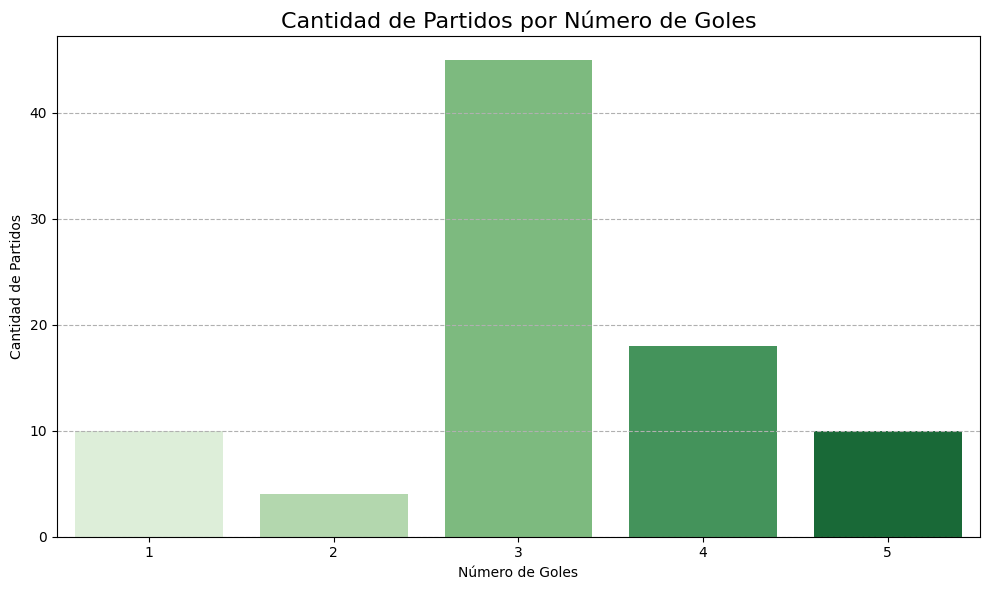

In [8]:
# Obtener la cantidad de goles por partido
goal_counts = data_goles_filtered.groupby('match_id').size().reset_index(name='total_goals')

# Crear barplot de la distribución de goles por partido
plt.figure(figsize=(10, 6))
sns.countplot(data=goal_counts, x='total_goals', palette='Greens')
plt.title('Cantidad de Partidos por Número de Goles', fontsize=16)
plt.xlabel('Número de Goles')
plt.ylabel('Cantidad de Partidos')
plt.xticks()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [9]:
# Filtrar partidos con el máximo time entre 179 y 180
matches_grouped = data_posiciones_filtered.groupby('match_id')['time'].max().reset_index()
matches_that_finished_by_time_limit = matches_grouped[(matches_grouped['time'] >= 179) & (matches_grouped['time'] <= 180)]

# Filtrar partidos con el máximo time menor a 179 y un ganador con 3 goles o más
matches_that_finished_by_red_or_blue_win = matches_grouped[matches_grouped['time'] < 179]
match_results = data_goles_filtered.groupby(['match_id', 'equipo']).size().unstack(fill_value=0).reset_index()
match_results.columns = ['match_id', 'Blue', 'Red']

# Filtrar para los partidos donde el ganador tiene 3 goles o más
match_results['Red'] = match_results['Red'].astype(int)
match_results['Blue'] = match_results['Blue'].astype(int)

match_results_filtered = match_results[(match_results['Red'] >= 3) | (match_results['Blue'] >= 3)]
matches_that_finished_by_red_or_blue_win = matches_that_finished_by_red_or_blue_win[matches_that_finished_by_red_or_blue_win['match_id'].isin(match_results_filtered['match_id'])]

# Filtrar partidos con el máximo time mayor a 180 y con un ganador
matches_that_finished_after_180 = matches_grouped[matches_grouped['time'] > 180]
matches_that_finished_after_180 = matches_that_finished_after_180[matches_that_finished_after_180['match_id'].isin(match_results['match_id'])]

# Concatenar todos los partidos válidos
valid_matches = pd.concat([
    matches_that_finished_by_time_limit,
    matches_that_finished_by_red_or_blue_win,
    matches_that_finished_after_180
])

# Combinar con los resultados de goles
valid_matches_with_results = match_results.merge(valid_matches, on='match_id')

# Añadir la columna de resultado como texto
valid_matches_with_results['Resultado'] = valid_matches_with_results.apply(
    lambda row: f"{int(row['Red'])}-{int(row['Blue'])}", axis=1
)

# Añadir la columna de "Modo de victoria" para indicar cómo terminó cada partido
valid_matches_with_results['Modo_Victoria'] = valid_matches_with_results['time'].apply(
    lambda x: 'Antes del 180' if x < 179 else ('En el 180' if 179 <= x <= 181 else 'Después del 180')
)

# Filtrar los partidos con resultados relevantes
valid_matches_with_results_filtered = valid_matches_with_results[
    (valid_matches_with_results['Red'] != valid_matches_with_results['Blue']) | 
    (valid_matches_with_results['Red'] >= 3) | 
    (valid_matches_with_results['Blue'] >= 3)
]

# Mostrar el DataFrame resultante
print(valid_matches_with_results_filtered)

    match_id  Blue  Red        time Resultado  Modo_Victoria
0         12     2    1  179.533333       1-2      En el 180
1         14     2    1  179.016667       1-2      En el 180
2         15     3    2  175.900000       2-3  Antes del 180
3         18     2    0  180.000000       0-2      En el 180
4         19     1    3   97.716667       3-1  Antes del 180
..       ...   ...  ...         ...       ...            ...
74       138     1    3  162.616667       3-1  Antes del 180
75       140     1    0  179.850000       0-1      En el 180
76       141     0    3   68.600000       3-0  Antes del 180
77       144     0    3   85.233333       3-0  Antes del 180
78       146     3    1  179.266667       1-3      En el 180

[79 rows x 6 columns]


In [10]:
valid_matches_with_results_filtered['Modo_Victoria'].value_counts()

Modo_Victoria
Antes del 180      54
En el 180          15
Después del 180    10
Name: count, dtype: int64

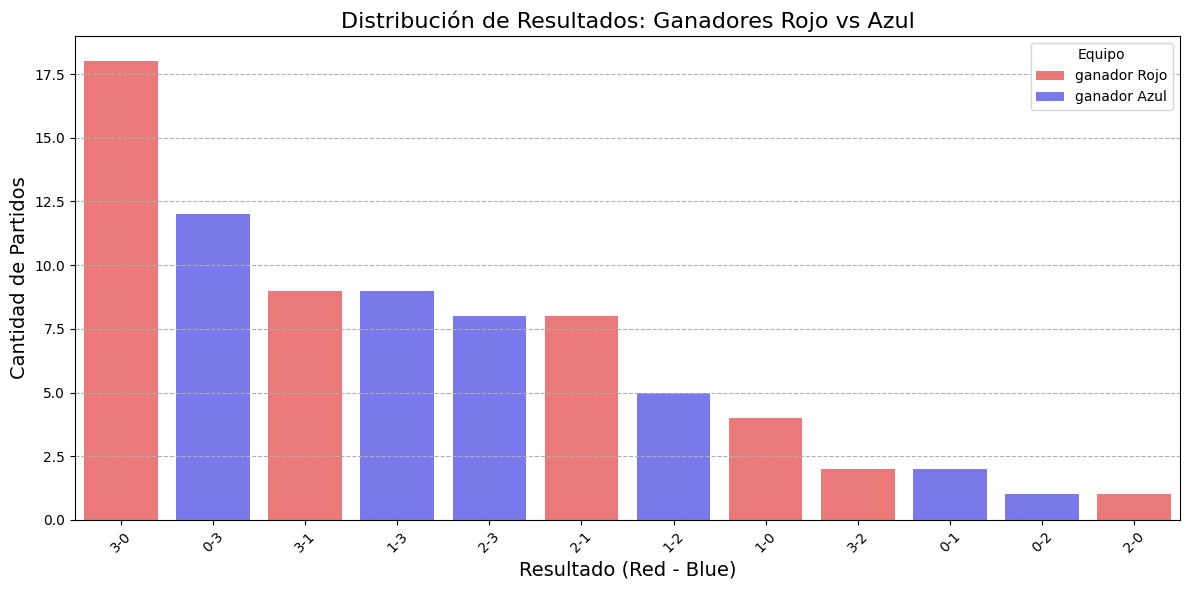

In [11]:
# Dividir los datos para los partidos ganados por el equipo rojo y azul
matches_red_wins  = valid_matches_with_results_filtered[valid_matches_with_results_filtered['Red'] > valid_matches_with_results_filtered['Blue']]
matches_blue_wins = valid_matches_with_results_filtered[valid_matches_with_results_filtered['Blue'] > valid_matches_with_results_filtered['Red']]

# Encontrar el máximo conteo de los resultados para ajustar los límites del gráfico
max_red_wins_count = matches_red_wins['Resultado'].value_counts().max()
max_blue_wins_count = matches_blue_wins['Resultado'].value_counts().max()
max_count = max(max_red_wins_count, max_blue_wins_count)

# Crear el gráfico en una sola figura
plt.figure(figsize=(12, 6))

# Barplot para el equipo rojo
sns.countplot(data=matches_red_wins, x='Resultado', order=valid_matches_with_results_filtered['Resultado'].value_counts().index, color='red', label='Rojo', alpha=0.6)

# Barplot para el equipo azul, superpuesto al gráfico rojo
sns.countplot(data=matches_blue_wins, x='Resultado', order=valid_matches_with_results_filtered['Resultado'].value_counts().index, color='blue', label='Azul', alpha=0.6)

# Ajustes de título, etiquetas y leyenda
plt.title('Distribución de Resultados: Ganadores Rojo vs Azul', fontsize=16)
plt.xlabel('Resultado (Red - Blue)', fontsize=14)
plt.ylabel('Cantidad de Partidos', fontsize=14)
plt.ylim(0, max_count + 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Mostrar leyenda
plt.legend(title='Equipo', labels=['ganador Rojo', 'ganador Azul'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Distribucion de los ticks en los momentos captados en los partidos

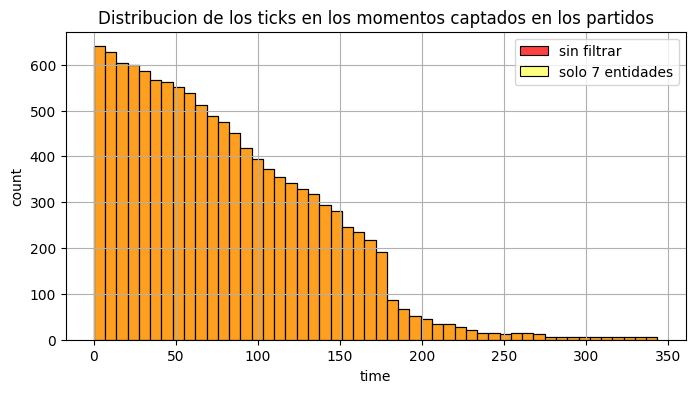

In [12]:
# Histograma de la distribucion de los ticks en los momentos captados en los partidos
plt.figure(figsize=(8, 4))

h1 = sns.histplot(data_time_counts, x='time', weights='count', color='red', kde=False, bins=50, label='sin filtrar')
h2 = sns.histplot(data_time_counts_7ents, x='time', weights='count', color='yellow', alpha=0.5, kde=False, bins=50, label='solo 7 entidades')

plt.title('Distribucion de los ticks en los momentos captados en los partidos')
plt.xlabel('time')
plt.ylabel('count')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.grid(True)

plt.show()

El histograma muestra la distribución de los ticks de los momentos de los partidos que fueron recoilados. En rojo grafico se muestran todos, en amarillo a los pertenecientes a momentos con 7 entidades exactamente en la cancha, y en naranja cuando ambas barras se solapan (es de esperar que no se vea amarillo, y solo naranja).

Notar que la duración estándar de un partido es de 300 ticks, pero puede terminar antes si un equipo mete 3 goles, o puede terminar despues si en el tick 300 el partido va empatado.

### Distribucion de goles a lo largo de los ticks

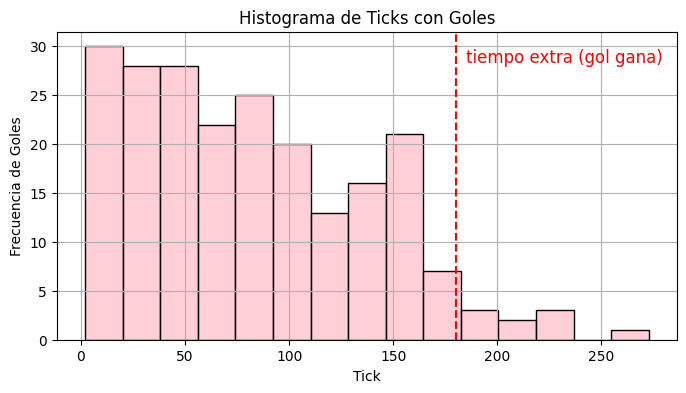

In [13]:
plt.figure(figsize=(8,4))

# Crear el histograma
sns.histplot(data=data_goles_filtered, x='tick', bins=15, kde=False, color='pink')

# Añadir una línea punteada en el valor 180 del eje x
plt.axvline(x=180, color='red', linestyle='--')

# Añadir un texto a la derecha de la línea
plt.text(185, plt.gca().get_ylim()[1] * 0.9, 'tiempo extra (gol gana)', color='red', fontsize=12)

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Ticks con Goles')
plt.xlabel('Tick')
plt.ylabel('Frecuencia de Goles')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Momentos de partidos

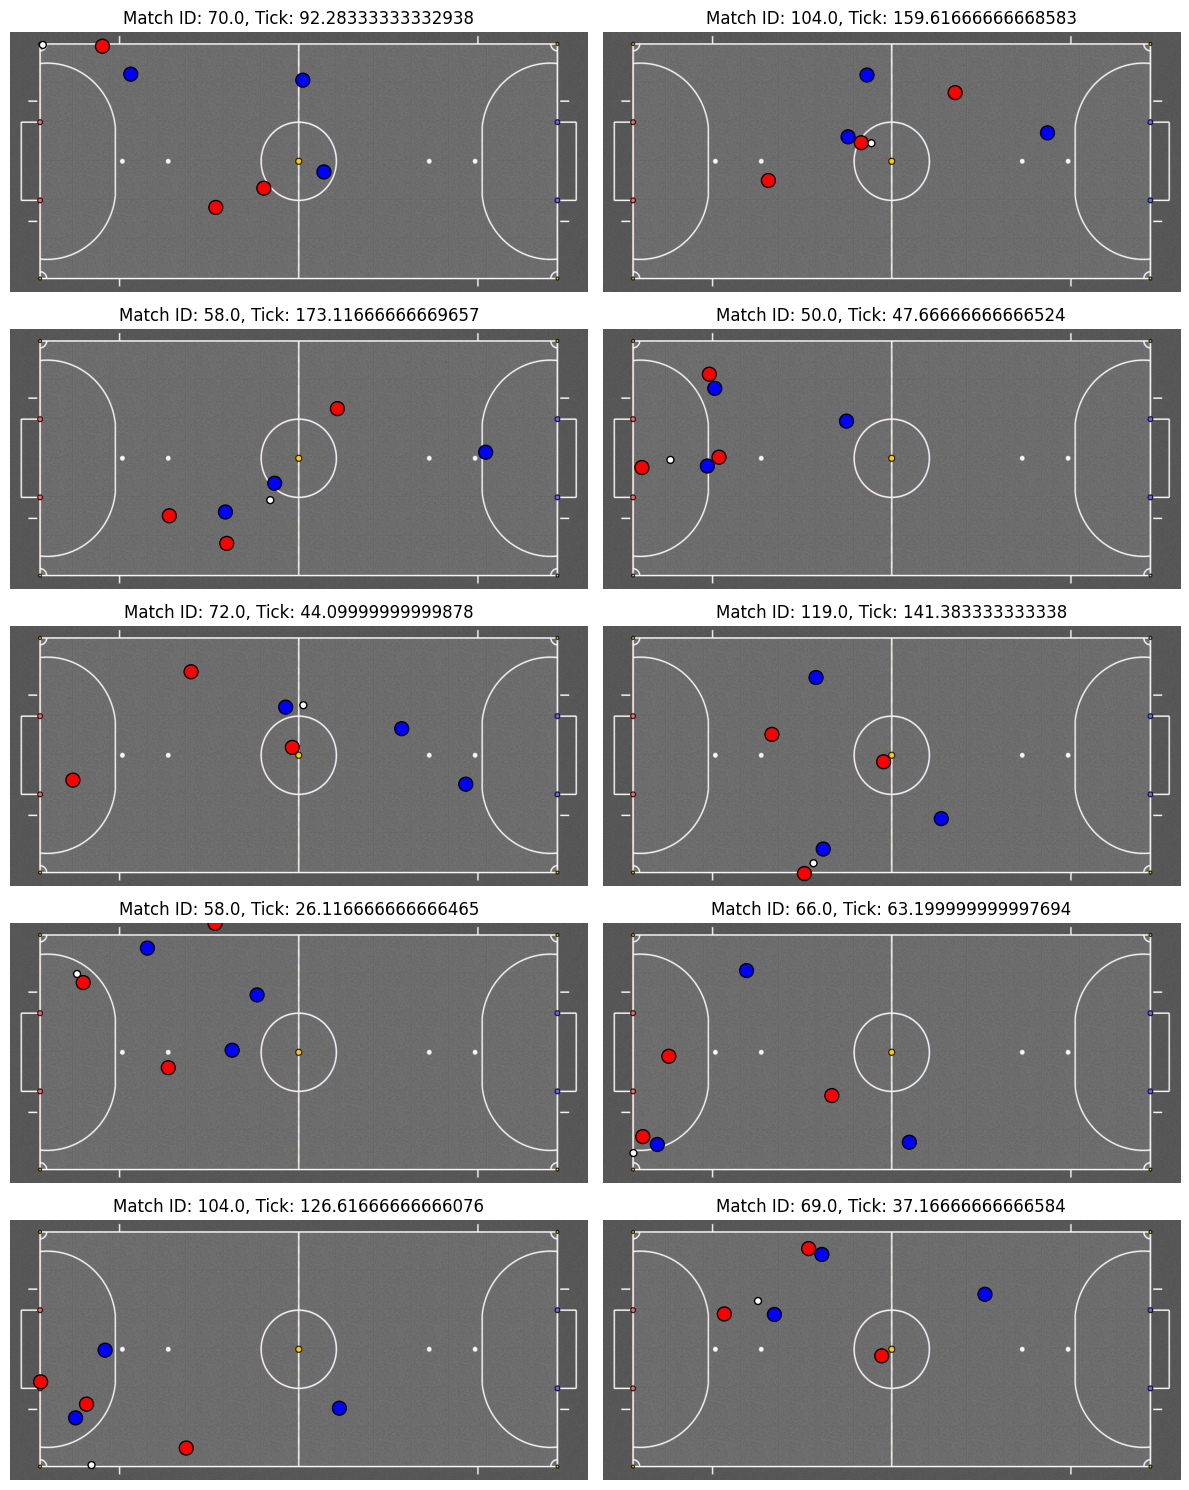

In [6]:
# Plots de momentos de partidos al azar

# Seleccionar aleatoriamente combinaciones de match_id y tick
unique_moments = data_posiciones_filtered[['match_id', 'time']].drop_duplicates()
random_moments = unique_moments.sample(n=10)

# Crear subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.ravel()  # Aplanar el array de ejes para facilitar el acceso

# Filtrar y graficar los datos para cada momento seleccionado
for i, (index, moment) in enumerate(random_moments.iterrows()):
    match_id = moment['match_id']
    tick = moment['time']
    
    # Filtrar datos para el momento actual
    moment_data = data_posiciones_filtered[(data_posiciones_filtered['match_id'] == match_id) & (data_posiciones_filtered['time'] == tick)]

    
    # Graficar los datos en el subplot correspondiente
    ax = axs[i]
    ax.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')
    
    # Asignar colores y tamaños según el equipo
    colors = moment_data['team'].astype(str).map({'0': 'white', '1': 'red', '2': 'blue'})
    sizes = moment_data['team'].astype(str).map({'0': 25, '1': 100, '2': 100})
    
    scatter = ax.scatter(moment_data['x'], moment_data['y'], c=colors, s=sizes, edgecolors='black')
    ax.set_title(f'Match ID: {match_id}, Tick: {tick}')
    ax.set_xlim([-605, 605])
    ax.set_ylim([-255, 255])
    ax.axis('off')  # Opcional: para ocultar los ejes

plt.tight_layout()
plt.show()

In [7]:
moment_data

id  match_id  player_id           x           y  velocity_x  \
17717  42337        69         71 -349.770115   71.163780  -36.912334   
17718  42338        69         48 -173.065436  199.517012  -60.435130   
17719  42339        69         63  -19.990552  -11.182504  -46.153883   
17720  42340        69          2  196.350485  109.710357   -1.534747   
17721  42341        69         58 -145.355366  188.021272  -88.904952   
17722  42342        69         69 -244.830284   70.063066  -76.829667   
17723  42343        69          0 -279.130451   96.556471 -171.521306   

       velocity_y       time  team  cant_de_duplicados  
17717  -58.610175  37.166667     1                   1  
17718  -28.092011  37.166667     1                   1  
17719 -104.869953  37.166667     1                   1  
17720  -88.328567  37.166667     2                   1  
17721   -8.504232  37.166667     2                   1  
17722  -29.504031  37.166667     2                   1  
17723 -106.472204  37.166667     0                   1

### Etiquetando algunos datos


In [18]:
# Crear nuevas columnas en nuevo dataframe de etiquetado, inicializadas con 'none' para indicar si habrá gol en los próximos 'n' ticks

data_grouped_entities_7ents_labeled = data_grouped_entities_7ents
data_grouped_entities_7ents_labeled['gol_1_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_2_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_3_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_4_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_5_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_6_ticks'] = 'none'

# Crear un diccionario para acceso rápido a los goles por match_id
goles_dict = data_goles_filtered.groupby('match_id').apply(lambda x: x[['tick', 'equipo']].to_dict('records')).to_dict()

In [19]:
# Iterar sobre las filas de data_grouped_entities_7ents
for index, row in data_grouped_entities_7ents.iterrows():
    match_id = row['match_id']
    time = row['time']
    
    if match_id in goles_dict:
        goles = goles_dict[match_id]
        
        # Filtrar goles futuros a partir del tiempo actual
        futuros_goles = [gol for gol in goles if gol['tick'] > time]
        
        for offset in range(1, 7):  # Revisar para ticks 1, 2, 3, 4, 5 y 6
            gol_cercano = next((gol['equipo'] for gol in futuros_goles if gol['tick'] <= time + offset), 'none')
            col_name = f'gol_{offset}_ticks'
            data_grouped_entities_7ents.at[index, col_name] = gol_cercano

In [23]:
# Verificar resultados solo para match_id elegido
match_id_test = 132
data_grouped_entities_7ents_match_id_test = data_grouped_entities_7ents[data_grouped_entities_7ents['match_id'] == match_id_test]

# Configurar para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita que las columnas se corten

# Muestra una muestra aleatoria o todas las filas del match_id 54
data_grouped_entities_7ents_match_id_test

match_id    time  entities gol_1_ticks gol_2_ticks gol_3_ticks gol_4_ticks gol_5_ticks gol_6_ticks
10458       132    0.65         7        none        none        none        none        none        none
10459       132    1.65         7        none        none        none        none        none        none
10460       132    2.65         7        none        none        none        none        none        none
10461       132    3.65         7        none        none        none        none        none        none
10462       132    4.65         7        none        none        none        none        none        none
10463       132    5.65         7        none        none        none        none        none        none
10464       132    6.65         7        none        none        none        none        none        none
10465       132    7.65         7        none        none        none        none        none        none
10466       132    8.65         7        none        none        none        none        none        none
10467       132    9.65         7        none        none        none        none        none        none
10468       132   10.65         7        none        none        none        none        none        none
10469       132   11.65         7        none        none        none        none        none        none
10470       132   12.65         7        none        none        none        none        none        none
10471       132   13.65         7        none        none        none        none        none        none
10472       132   14.65         7        none        none        none        none        none        none
10473       132   15.65         7        none        none        none        none        none        none
10474       132   16.65         7        none        none        none        none        none        none
10475       132   17.65         7        none        none        none        none        none        none
10476       132   18.65         7        none        none        none        none        none        none
10477       132   19.65         7        none        none        none        none        none        none
10478       132   20.65         7        none        none        none        none        none        none
10479       132   21.65         7        none        none        none        none        none        none
10480       132   22.65         7        none        none        none        none        none        none
10481       132   23.65         7        none        none        none        none        none        none
10482       132   24.65         7        none        none        none        none        none        none
10483       132   25.65         7        none        none        none        none        none        none
10484       132   26.65         7        none        none        none        none        none        none
10485       132   27.65         7        none        none        none        none        none        none
10486       132   28.65         7        none        none        none        none        none        none
10487       132   29.65         7        none        none        none        none        none        none
10488       132   30.65         7        none        none        none        none        none        none
10489       132   31.65         7        none        none        none        none        none        none
10490       132   32.65         7        none        none        none        none        none        none
10491       132   33.65         7        none        none        none        none        none        none
10492       132   34.65         7        none        none        none        none        none        none
10493       132   35.65         7        none        none        none        none        none        none
10494       132   36.65         7        none        none        none        none    

In [24]:
# Configurar para volver a los valores estandar de las filas y columnas
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')

### Posicionamiento en la cancha de todos los jugadores en un partido

match_id seleccionado: 132
Resultado del partido: Equipo Red 2 - 1 Equipo Blue


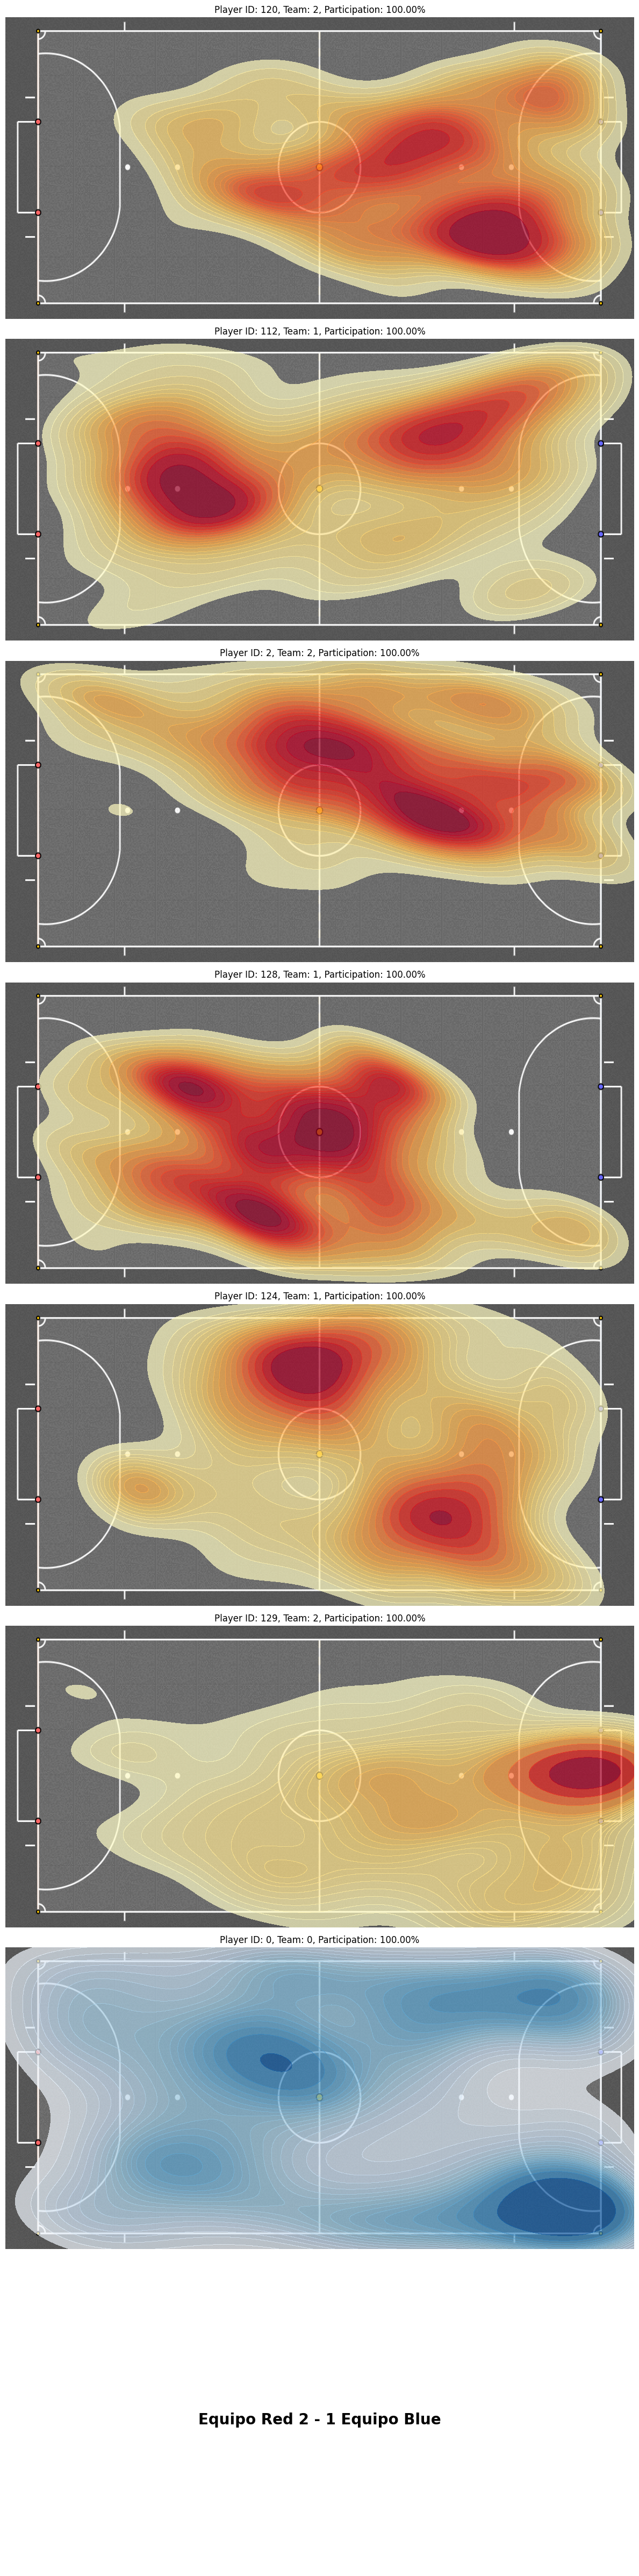

In [26]:
# Proporcionar el match_id deseado
match_id = 132  # Cambia esto al match_id deseado
print('match_id seleccionado:', match_id)

# Contar los goles de cada equipo en el partido
goles_red = data_goles_filtered[(data_goles_filtered['match_id'] == match_id) & (data_goles_filtered['equipo'] == 'Red')].shape[0]
goles_blue = data_goles_filtered[(data_goles_filtered['match_id'] == match_id) & (data_goles_filtered['equipo'] == 'Blue')].shape[0]
resultado_partido = f'Equipo Red {goles_red} - {goles_blue} Equipo Blue'
print('Resultado del partido:', resultado_partido)

# Filtrar todos los momentos de ese partido
match_data = data_posiciones_filtered[data_posiciones_filtered['match_id'] == match_id]

# Obtener las combinaciones únicas de jugador y equipo en el partido
unique_combinations = match_data[['player_id', 'team']].drop_duplicates()

# Crear subplots
fig, axs = plt.subplots(len(unique_combinations) + 1, 1, figsize=(12, (len(unique_combinations) + 1) * 6))
axs = axs.ravel()  # Aplanar el array de ejes para facilitar el acceso

# Cargar la imagen de fondo de la cancha de fútbol
background_image = mpimg.imread('C:/Users/ASROCK/Desktop/haxball_ai/maps/x3_bazinga.PNG')

# Calcular el número total de momentos en el partido
total_moments = match_data['time'].nunique()

# Iterar sobre cada combinación jugador-equipo y crear su mapa de calor
for i, (index, row) in enumerate(unique_combinations.iterrows()):
    player_id = row['player_id']
    team = row['team']
    
    # Filtrar datos para el jugador y equipo actual
    player_team_data = match_data[(match_data['player_id'] == player_id) & (match_data['team'] == team)]
    
    # Calcular el porcentaje de momentos en los que el jugador estuvo presente
    player_moments = player_team_data['time'].nunique()
    participation_percentage = (player_moments / total_moments) * 100
    
    # Graficar la imagen de fondo
    ax = axs[i]
    ax.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')

    # Gradiente de colores dependiendo de si es jugador o pelota
    if(player_id == 0):
        gradiente_de_colores = 'Blues'
    else:
        gradiente_de_colores = 'YlOrRd'

    
    # Crear el mapa de calor con la nueva paleta de colores y umbral ajustado
    sns.kdeplot(
        x=player_team_data['x'], y=player_team_data['y'], 
        fill=True, cmap=gradiente_de_colores, ax=ax, 
        bw_adjust=0.75, levels=20, thresh=0.1, alpha=0.7 # Umbral ajustado
    )
    
    ax.set_title(f'Player ID: {player_id}, Team: {team}, Participation: {participation_percentage:.2f}%')
    ax.set_xlim([-605, 605])
    ax.set_ylim([-255, 255])
    ax.axis('off')  # Opcional: para ocultar los ejes

# Añadir el resultado del partido en el último subplot
ax = axs[-1]
ax.text(0.5, 0.5, resultado_partido, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, weight='bold')
ax.axis('off')  # Ocultar los ejes

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Distribución de la pelota en todos los partidos de la base de datos

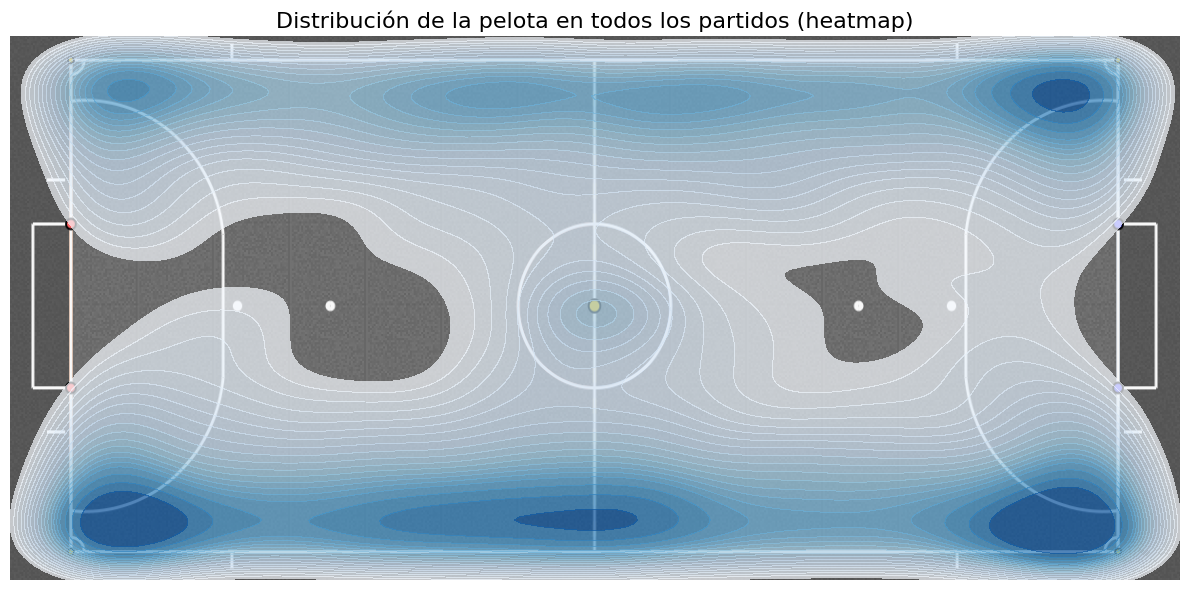

In [27]:
# Filtrar solo las posiciones de la pelota
ball_data = data_posiciones_filtered[data_posiciones_filtered['player_id'] == 0]

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')

# Crear el mapa de calor para las posiciones de la pelota
sns.kdeplot(
    x=ball_data['x'], y=ball_data['y'], 
    fill=True, cmap='Blues', bw_adjust=0.75, levels=20, thresh=0.1, alpha=0.7
)

# Configurar límites y ocultar ejes
plt.xlim([-605, 605])
plt.ylim([-255, 255])
plt.axis('off')  # Ocultar ejes

# Título
plt.title('Distribución de la pelota en todos los partidos (heatmap)', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

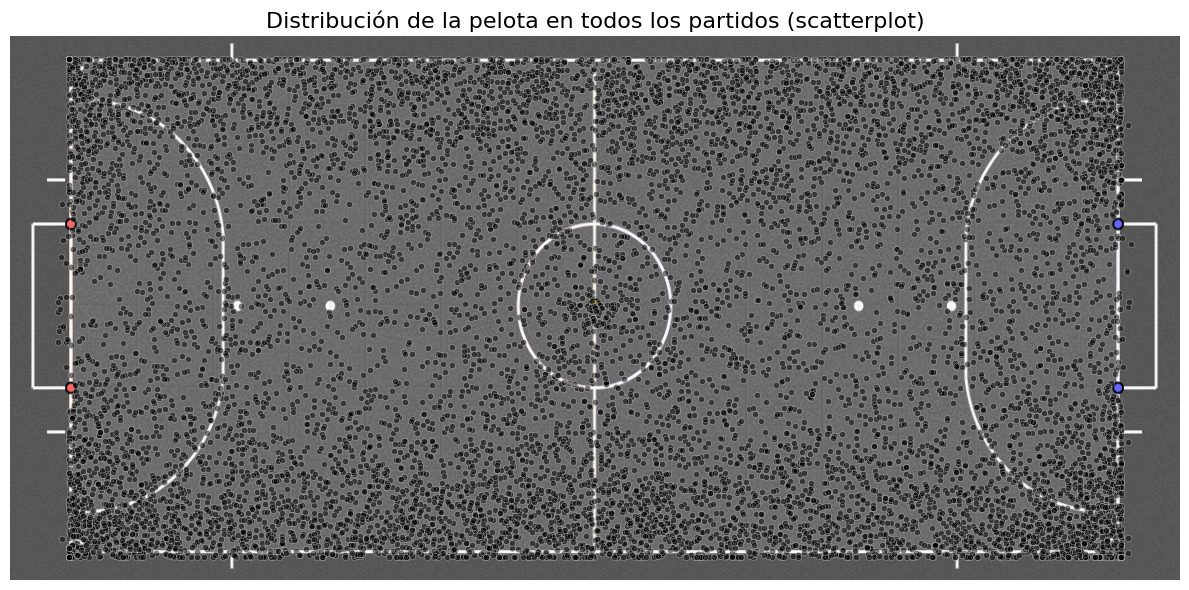

In [28]:
plt.figure(figsize=(12, 6))
plt.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')

sns.scatterplot(
    x=ball_data['x'], y=ball_data['y'],
    color='Black', edgecolor='White', s=20, alpha=0.5
)

plt.xlim([-605, 605])
plt.ylim([-255, 255])
plt.axis('off')  # Ocultar ejes

plt.title('Distribución de la pelota en todos los partidos (scatterplot)', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Posicionamiento de la pelota antes de un gol en menos de n ticks, para cada equipo

In [35]:
# Función para crear mapas de calor en una cuadrícula
def plot_heatmaps_for_team(equipo, title_prefix, data_posiciones, data_grouped_entities_7ents):
    fig, axs = plt.subplots(2, 3, figsize=(12, 6))
    axs = axs.ravel()  # Aplanar para iterar fácilmente

    background_image = mpimg.imread('C:/Users/ASROCK/Desktop/haxball_ai/maps/x3_bazinga.PNG') # Mapa de la cancha en formato '.png'
    
    for ticks in range(1, 7):
        column_name = f'gol_{ticks}_ticks'
        title_suffix = f'gol del {equipo} en menos de {ticks} ticks'
        
        # Filtrar data_grouped_entities_7ents según la columna correspondiente
        filtered_times = data_grouped_entities_7ents[
            data_grouped_entities_7ents[column_name] == equipo
        ]['time']
        
        # Filtrar posiciones de la pelota
        ball_data_filtered = data_posiciones[
            (data_posiciones['player_id'] == 0) & (data_posiciones['time'].isin(filtered_times))
        ]
        
        # Crear el mapa de calor en el subplot correspondiente
        ax = axs[ticks - 1]
        ax.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')
        
        sns.kdeplot(
            x=ball_data_filtered['x'], y=ball_data_filtered['y'], 
            fill=True, cmap='Blues', bw_adjust=0.75, levels=20, thresh=0.1, alpha=0.7, ax=ax
        )
        
        ax.set_xlim([-605, 605])
        ax.set_ylim([-255, 255])
        ax.axis('off')
        ax.set_title(f'{title_prefix}\n{title_suffix}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

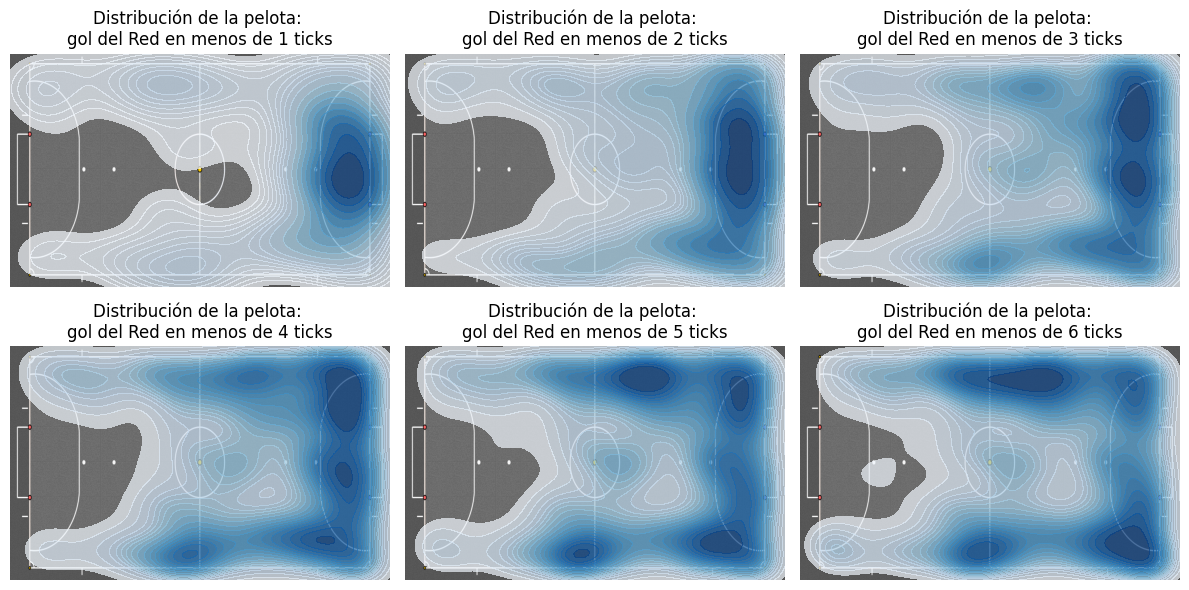

In [36]:
plot_heatmaps_for_team(equipo='Red', title_prefix='Distribución de la pelota: ', data_posiciones=data_posiciones_filtered, data_grouped_entities_7ents=data_grouped_entities_7ents)

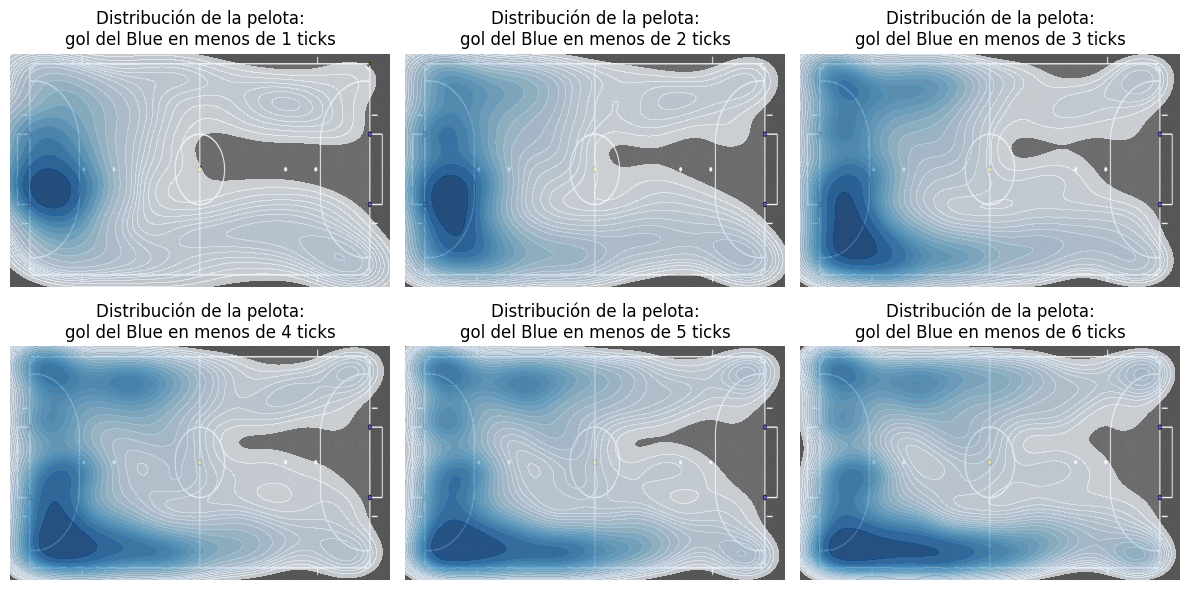

In [37]:
plot_heatmaps_for_team(equipo='Blue', title_prefix='Distribución de la pelota:', data_posiciones=data_posiciones_filtered, data_grouped_entities_7ents=data_grouped_entities_7ents)